In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx 
import matplotlib.pyplot as plt
import itertools as it
import seaborn as sns
import pickle
import statistics

In [ ]:
2+2

4

In [ ]:
conn = pd.read_csv('/content/drive/MyDrive/Esperimenti/jan_lab.csv')

In [ ]:
conn['time'] =  pd.to_datetime(conn['time'],utc=True)
conn = conn.sort_values(by="time")

In [ ]:
conn.head()

,time,scanner,advertiser,power,rssi
0,2022-01-31 14:06:27+00:00,3656149444778942083,8255693867610784721,-4,-98
1,2022-01-31 14:06:44+00:00,3656149444778942083,8255693867610784721,-4,-99
2,2022-01-31 14:19:07+00:00,8513144764863685509,8255693867610784721,-4,-83
3,2022-01-31 14:19:08+00:00,8513144764863685509,8255693867610784721,-4,-81
4,2022-01-31 14:19:08+00:00,8513144764863685509,8255693867610784721,-4,-82


In [ ]:
scan = conn.scanner.unique()
adv = conn.advertiser.unique()
x = set()
for s in scan:
  x.add(s)
for b in adv:
  x.add(b)

print(x)

{3656149444778942083, 1330003011404815204, 8513144764863685509, 8998985862534856713, 1765587011174908658, 8255693867610784721, 7496792002317501170, 3108470569485178681, 7536319712228151608}


In [ ]:
len(adv)

8

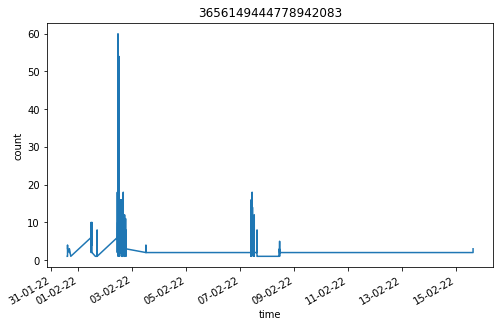

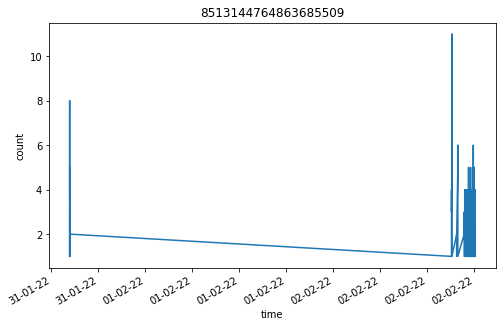

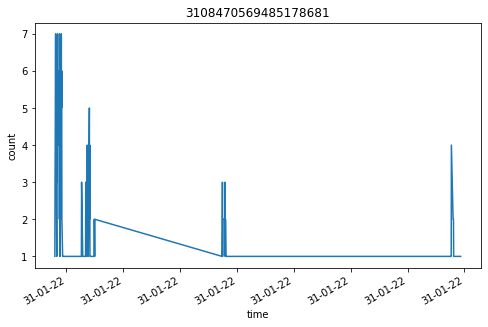

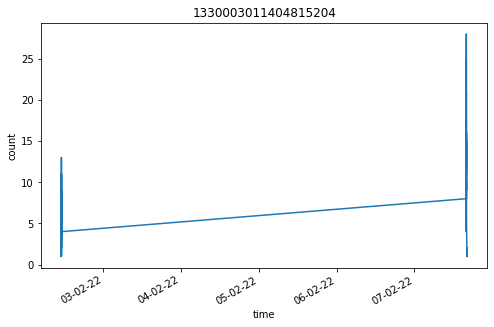

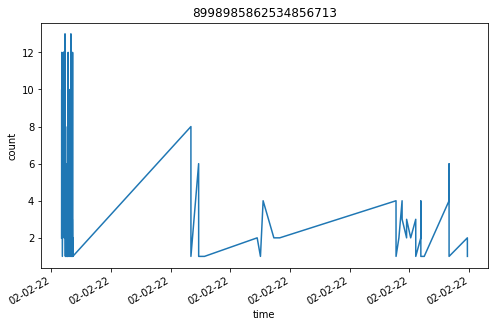

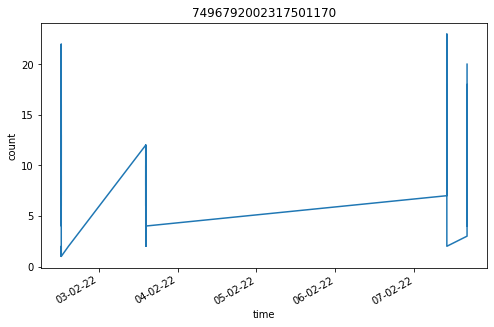

In [ ]:
for id in scan:
  plt.figure(figsize=(8,5))
  conn.loc[conn['scanner']==id].groupby('time').rssi.count().plot()
  ax = plt.gca()
  ax.set_ylabel("count")
  plt.title(id)
  from matplotlib.dates import DateFormatter
  formatter = DateFormatter("%d-%m-%y")
  ax.xaxis.set_major_formatter(formatter)
  plt.show()

In [ ]:
for id in scan:
  seen = conn.loc[conn['scanner']==id].advertiser.unique()
  print('\n',id,' has seen: ',len(seen),' devices: \n',seen)


 3656149444778942083  has seen:  7  devices: 
 [8255693867610784721 8513144764863685509 3108470569485178681
 8998985862534856713 7496792002317501170 7536319712228151608
 1765587011174908658]

 8513144764863685509  has seen:  6  devices: 
 [8255693867610784721 3656149444778942083 8998985862534856713
 7536319712228151608 3108470569485178681 7496792002317501170]

 3108470569485178681  has seen:  1  devices: 
 [3656149444778942083]

 1330003011404815204  has seen:  5  devices: 
 [8998985862534856713 3656149444778942083 3108470569485178681
 7496792002317501170 8255693867610784721]

 8998985862534856713  has seen:  3  devices: 
 [3656149444778942083 3108470569485178681 7496792002317501170]

 7496792002317501170  has seen:  4  devices: 
 [3656149444778942083 8998985862534856713 3108470569485178681
 8255693867610784721]


In [ ]:
for id in scan:
  con2 = conn.loc[conn['scanner']==id].set_index('time')
  adv2 = con2.advertiser.unique()
  print('\nScanner is: ',id)
  for ad in adv2:
    print('id ',ad,' was seen times ', len(con2.loc[con2['advertiser']==ad]))


Scanner is:  3656149444778942083
id  8255693867610784721  was seen times  2
id  8513144764863685509  was seen times  64
id  3108470569485178681  was seen times  1036
id  8998985862534856713  was seen times  26284
id  7496792002317501170  was seen times  373
id  7536319712228151608  was seen times  10
id  1765587011174908658  was seen times  1

Scanner is:  8513144764863685509
id  8255693867610784721  was seen times  81
id  3656149444778942083  was seen times  180
id  8998985862534856713  was seen times  1313
id  7536319712228151608  was seen times  33
id  3108470569485178681  was seen times  2
id  7496792002317501170  was seen times  10

Scanner is:  3108470569485178681
id  3656149444778942083  was seen times  232

Scanner is:  1330003011404815204
id  8998985862534856713  was seen times  221
id  3656149444778942083  was seen times  216
id  3108470569485178681  was seen times  161
id  7496792002317501170  was seen times  170
id  8255693867610784721  was seen times  181

Scanner is:  89

tempo medio trascorso tra due rilevamenti
776.2958333333333
----------------------------


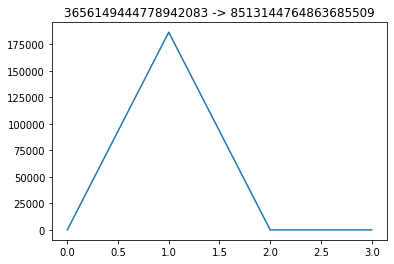

tempo medio trascorso tra due rilevamenti
128.37179487179486
----------------------------


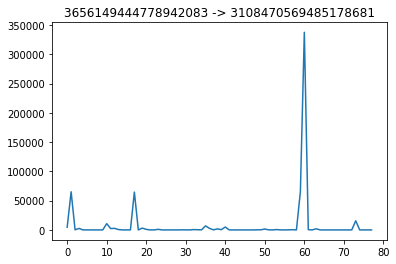

tempo medio trascorso tra due rilevamenti
338.07380952380953
----------------------------


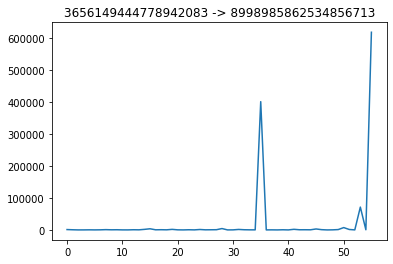

tempo medio trascorso tra due rilevamenti
394.5768518518518
----------------------------


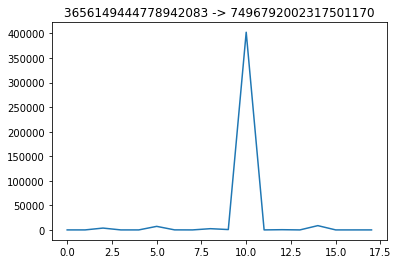

tempo medio trascorso tra due rilevamenti
282.2378787878788
----------------------------


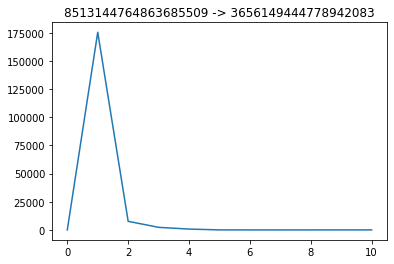

tempo medio trascorso tra due rilevamenti
7.266666666666667
----------------------------


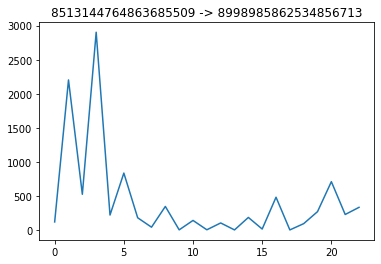

tempo medio trascorso tra due rilevamenti
15.194444444444445
----------------------------


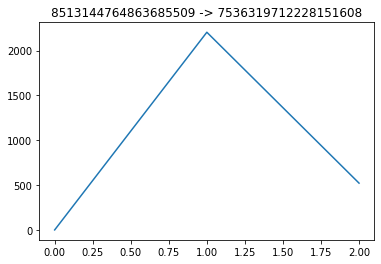

tempo medio trascorso tra due rilevamenti
2.845833333333333
----------------------------


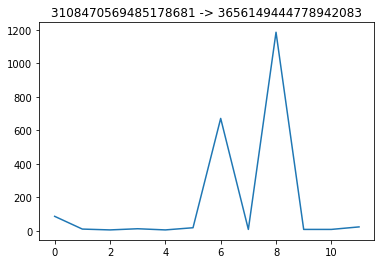

tempo medio trascorso tra due rilevamenti
750.565
----------------------------


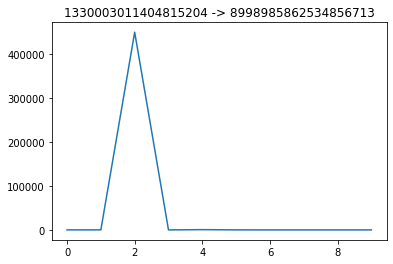

tempo medio trascorso tra due rilevamenti
1.1583333333333334
----------------------------


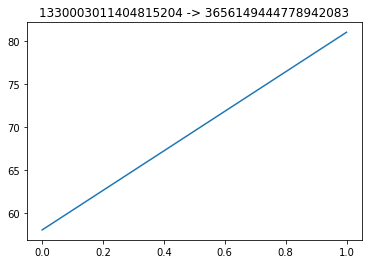

tempo medio trascorso tra due rilevamenti
1501.2033333333334
----------------------------


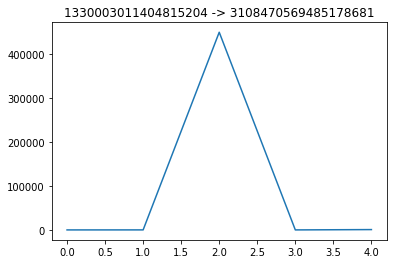

tempo medio trascorso tra due rilevamenti
33.97083333333333
----------------------------


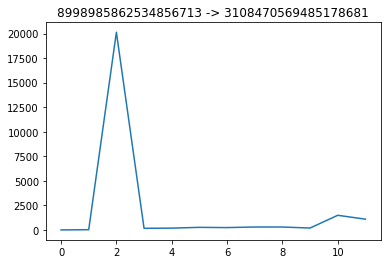

tempo medio trascorso tra due rilevamenti
12.75
----------------------------


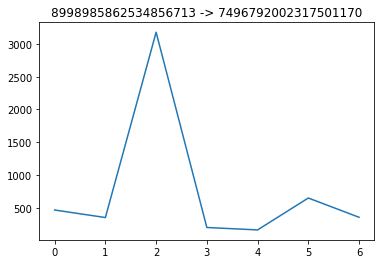

tempo medio trascorso tra due rilevamenti
3515.241666666667
----------------------------


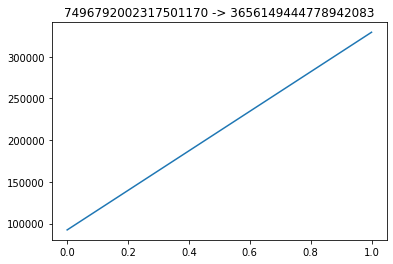

tempo medio trascorso tra due rilevamenti
3699.633333333333
----------------------------


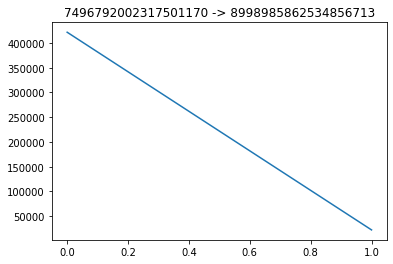

tempo medio trascorso tra due rilevamenti
3633.9083333333333
----------------------------


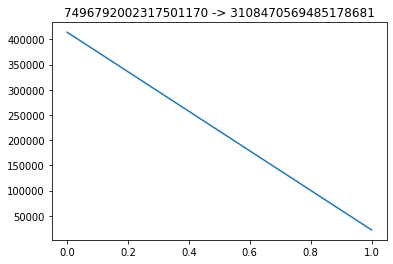

In [ ]:
#calcolo il tempo trascorso tra un contatto e un altro 
from matplotlib.dates import DateFormatter
formatter = DateFormatter("%d-%m-%y")
for id in scan:
  adv3 = conn.loc[conn['scanner']==id].advertiser.unique()
  for ad in adv3:
    con3 = conn[(conn['scanner']==id) & (conn['advertiser']==ad)]#.set_index('time')
    con3 = con3.reset_index(drop=True)
    l = list()
    dif3 = con3.diff()
    delta_diff3 = dif3[dif3.time>'5s']
    for t in delta_diff3.time:
      l.append(t.total_seconds())
    lf = pd.DataFrame(l, columns=['secondi'])
    if len(lf) > 1:    
      lf.secondi.plot()
      plt.title( str(id) + " -> " + str(ad))
      print("tempo medio trascorso tra due rilevamenti")
      print(lf.secondi.mean()/60)
      print("----------------------------")
      plt.show()
  


id: 3656149444778942083 -> 8255693867610784721
id: 3656149444778942083 -> 8513144764863685509
tempo medio di contatto in cui 3656149444778942083 -> 8513144764863685509
5.5


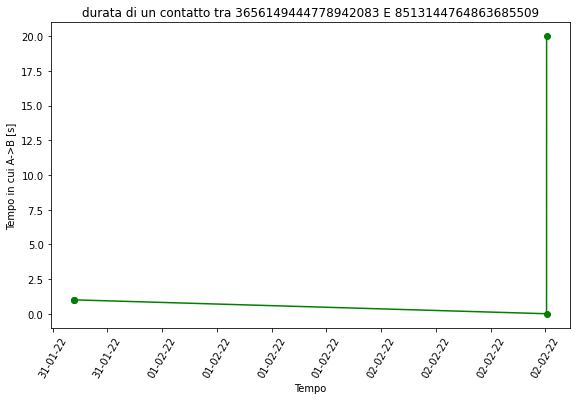

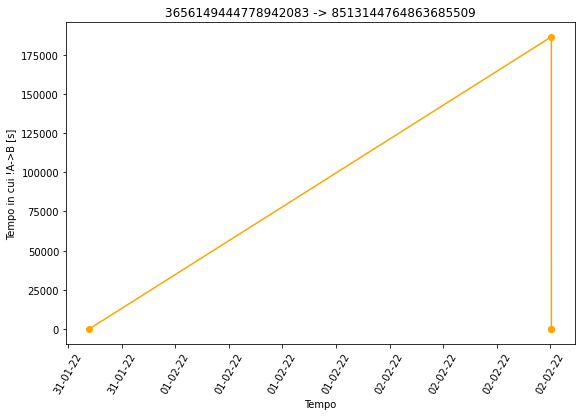

-------------------------


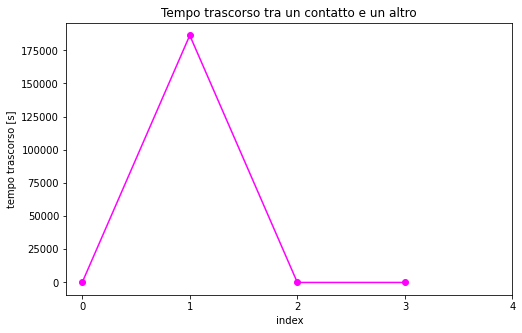

durata media contatti:5.5
quanto passa tra un contatto e un altro
--------------------
id: 3656149444778942083 -> 3108470569485178681
tempo medio di contatto in cui 3656149444778942083 -> 3108470569485178681
5.17948717948718


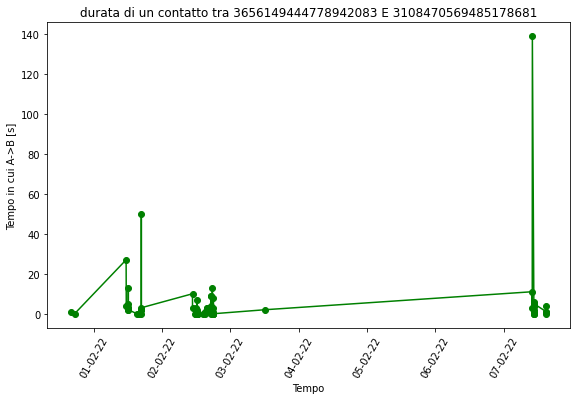

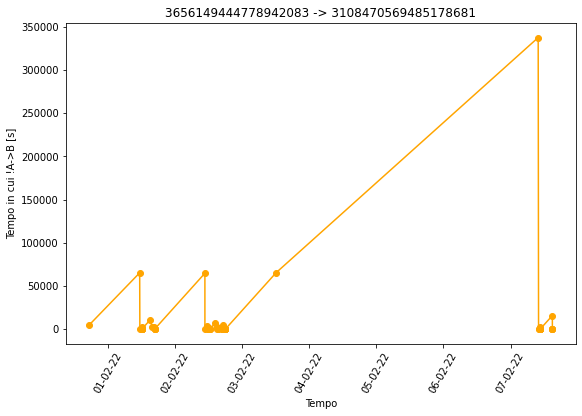

-------------------------


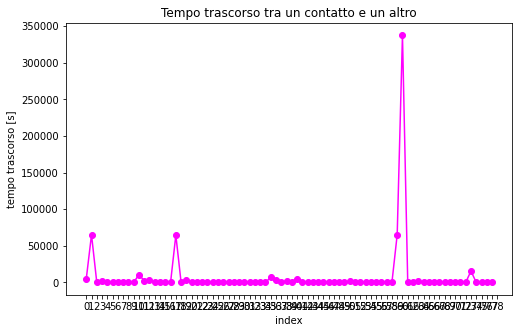

durata media contatti:5.17948717948718
quanto passa tra un contatto e un altro
--------------------
id: 3656149444778942083 -> 8998985862534856713
tempo medio di contatto in cui 3656149444778942083 -> 8998985862534856713
60.464285714285715


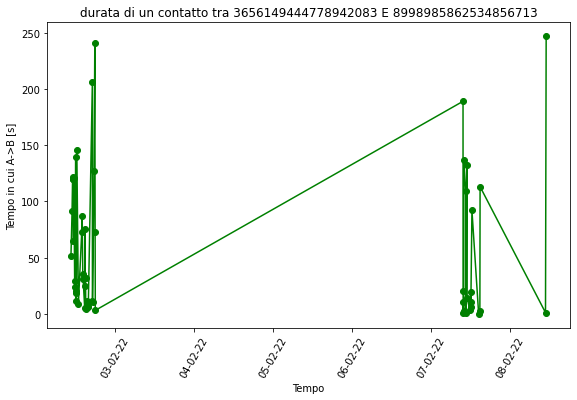

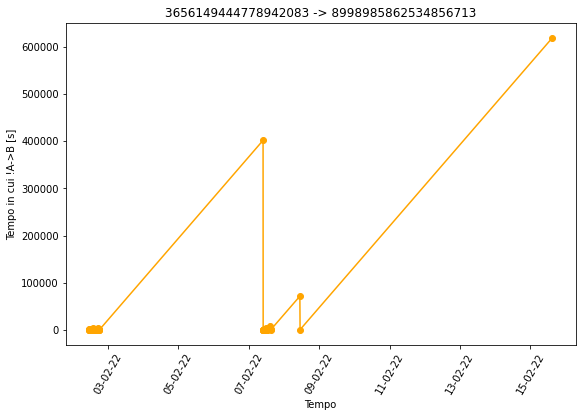

-------------------------


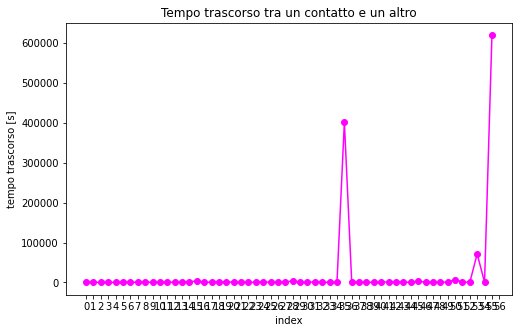

durata media contatti:60.464285714285715
quanto passa tra un contatto e un altro
--------------------
id: 3656149444778942083 -> 7496792002317501170
tempo medio di contatto in cui 3656149444778942083 -> 7496792002317501170
12.166666666666666


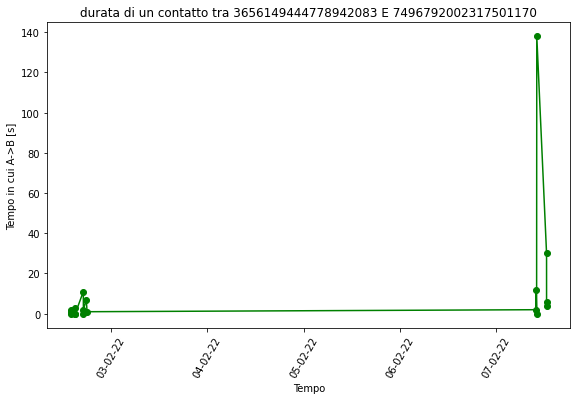

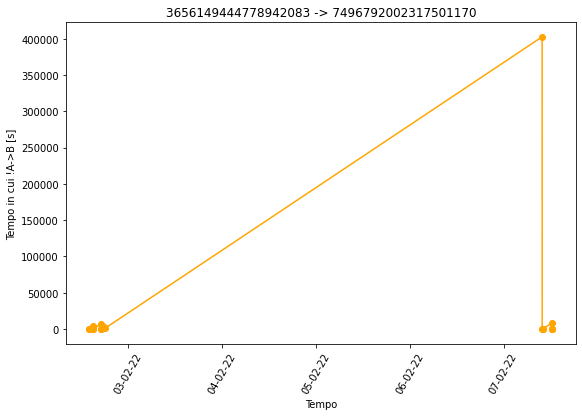

-------------------------


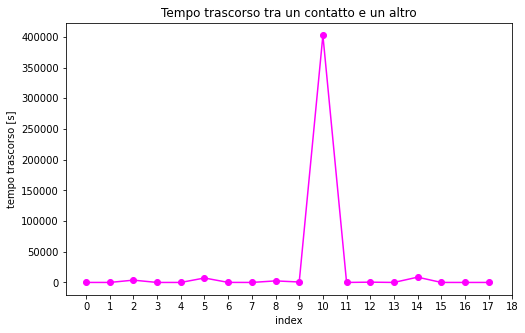

durata media contatti:12.166666666666666
quanto passa tra un contatto e un altro
--------------------
id: 3656149444778942083 -> 7536319712228151608
id: 3656149444778942083 -> 1765587011174908658
id: 8513144764863685509 -> 8255693867610784721
id: 8513144764863685509 -> 3656149444778942083
tempo medio di contatto in cui 8513144764863685509 -> 3656149444778942083
7.818181818181818


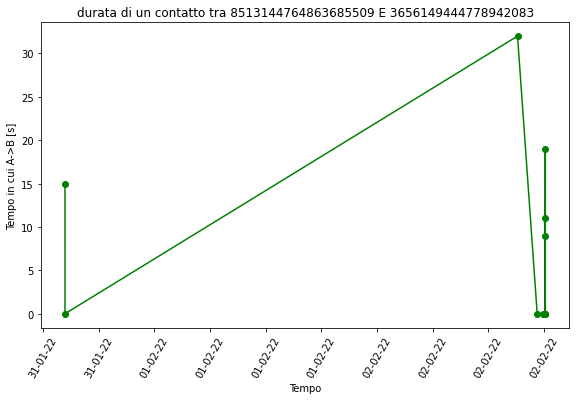

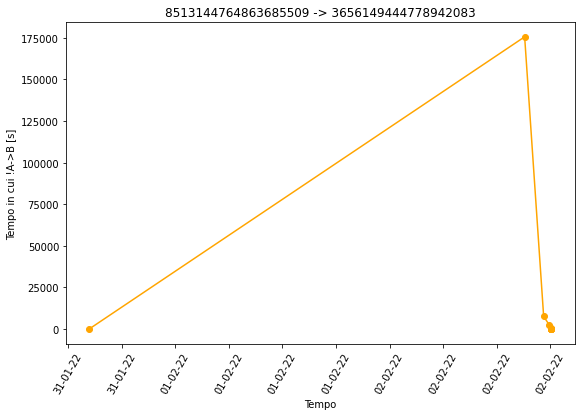

-------------------------


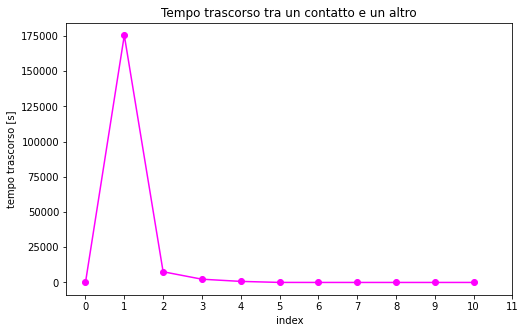

durata media contatti:7.818181818181818
quanto passa tra un contatto e un altro
--------------------
id: 8513144764863685509 -> 8998985862534856713
tempo medio di contatto in cui 8513144764863685509 -> 8998985862534856713
38.04347826086956


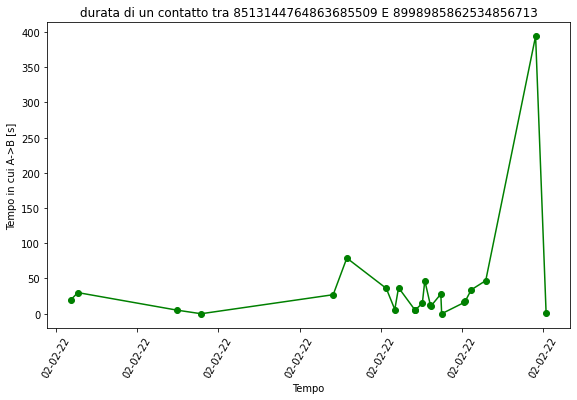

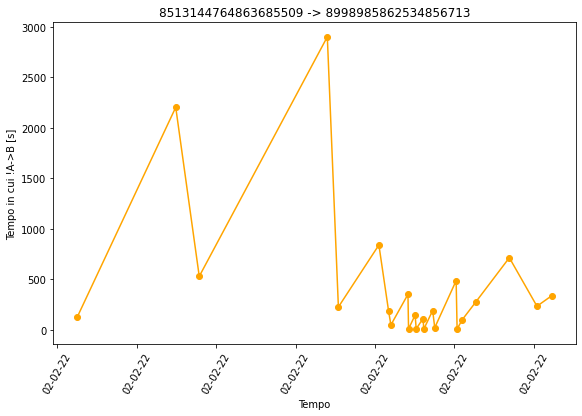

-------------------------


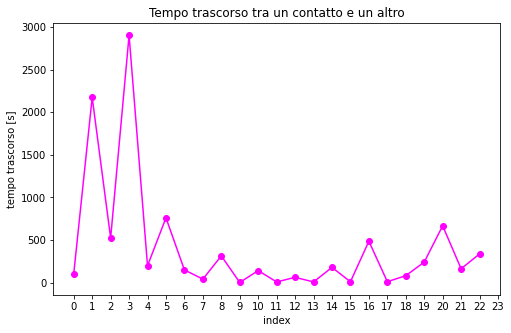

durata media contatti:38.04347826086956
quanto passa tra un contatto e un altro
--------------------
id: 8513144764863685509 -> 7536319712228151608
tempo medio di contatto in cui 8513144764863685509 -> 7536319712228151608
8.666666666666666


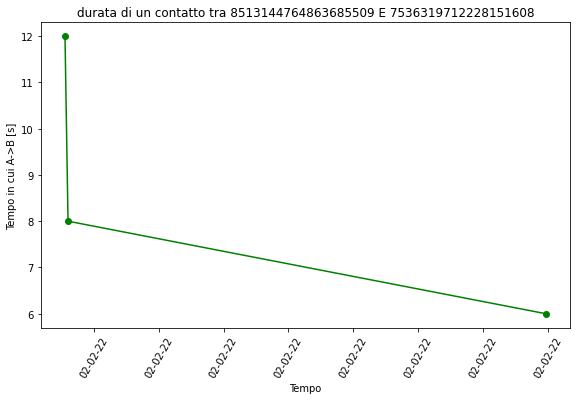

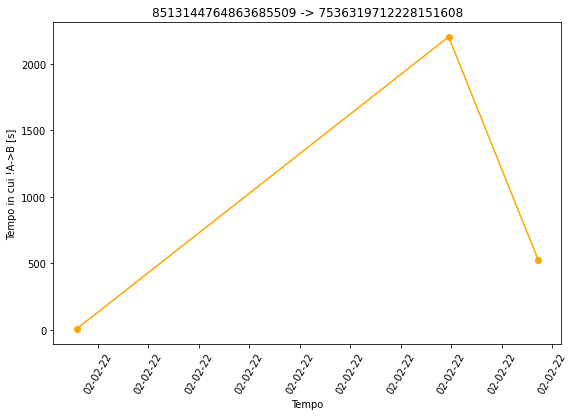

-------------------------


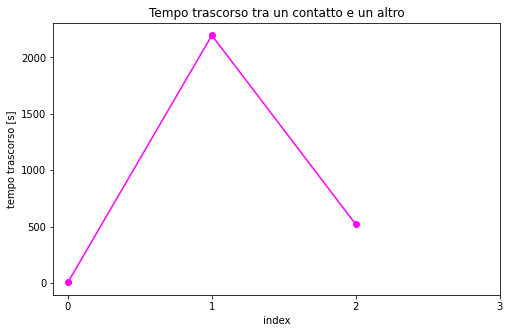

durata media contatti:8.666666666666666
quanto passa tra un contatto e un altro
--------------------
id: 8513144764863685509 -> 3108470569485178681
id: 8513144764863685509 -> 7496792002317501170
id: 3108470569485178681 -> 3656149444778942083
tempo medio di contatto in cui 3108470569485178681 -> 3656149444778942083
7.5


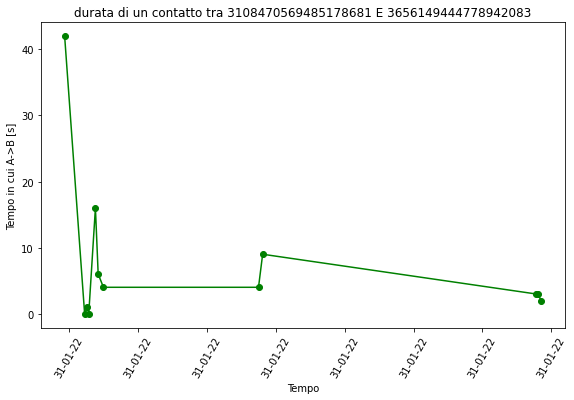

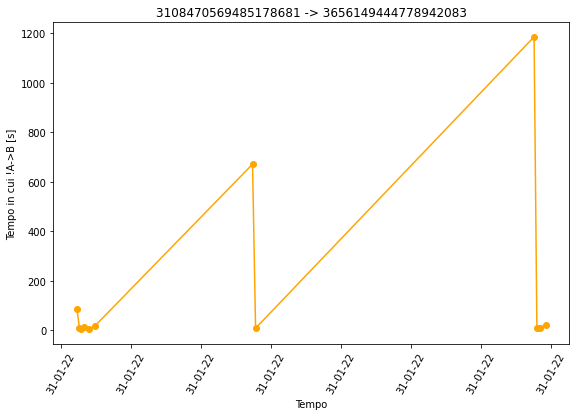

-------------------------


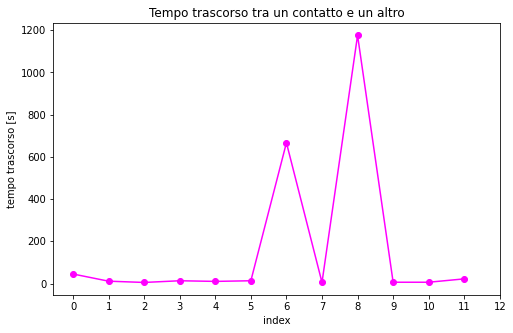

durata media contatti:7.5
quanto passa tra un contatto e un altro
--------------------
id: 1330003011404815204 -> 8998985862534856713
tempo medio di contatto in cui 1330003011404815204 -> 8998985862534856713
10.0


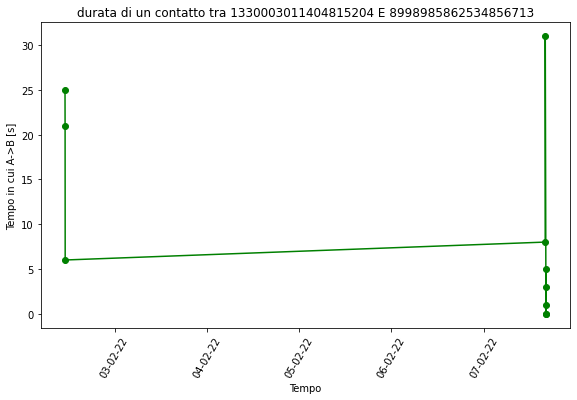

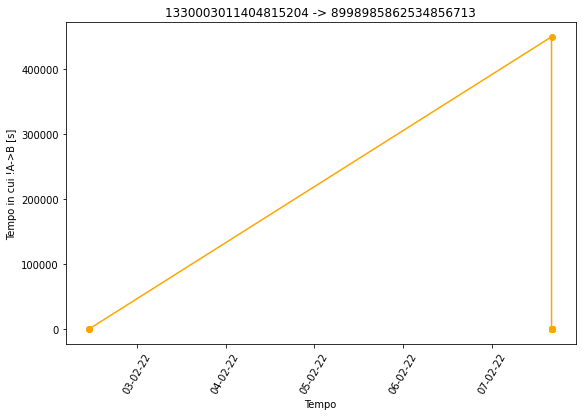

-------------------------


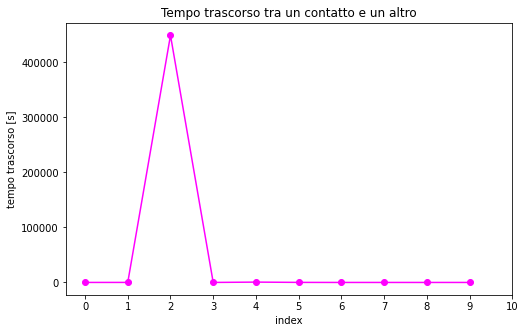

durata media contatti:10.0
quanto passa tra un contatto e un altro
--------------------
id: 1330003011404815204 -> 3656149444778942083
tempo medio di contatto in cui 1330003011404815204 -> 3656149444778942083
23.5


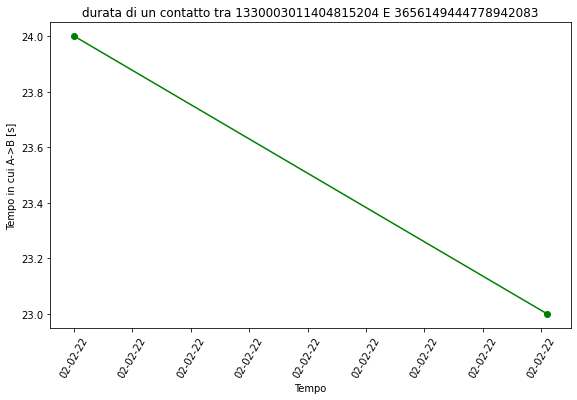

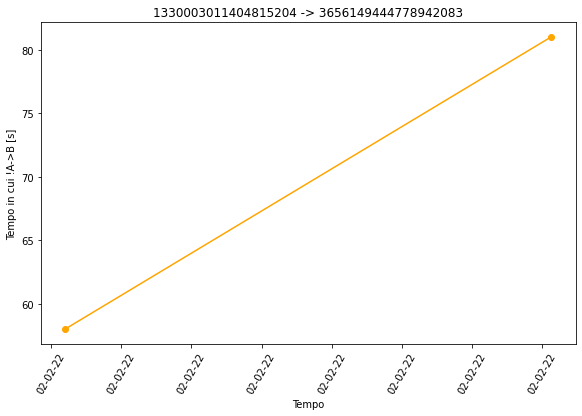

-------------------------


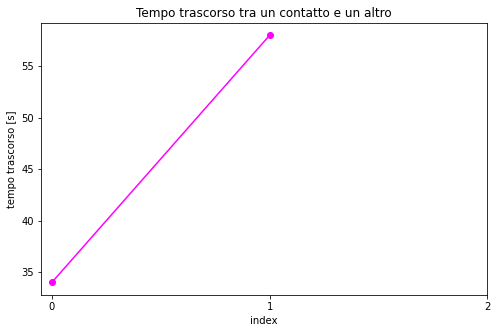

durata media contatti:23.5
quanto passa tra un contatto e un altro
--------------------
id: 1330003011404815204 -> 3108470569485178681
tempo medio di contatto in cui 1330003011404815204 -> 3108470569485178681
8.8


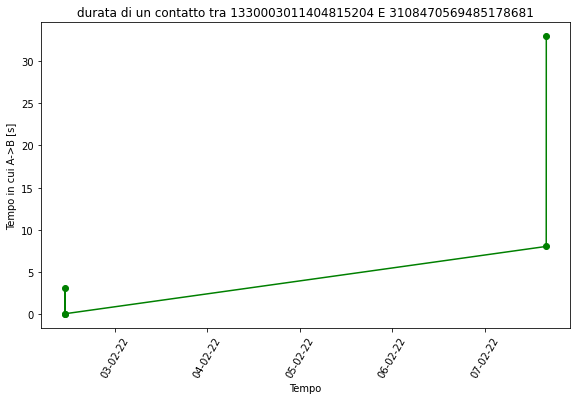

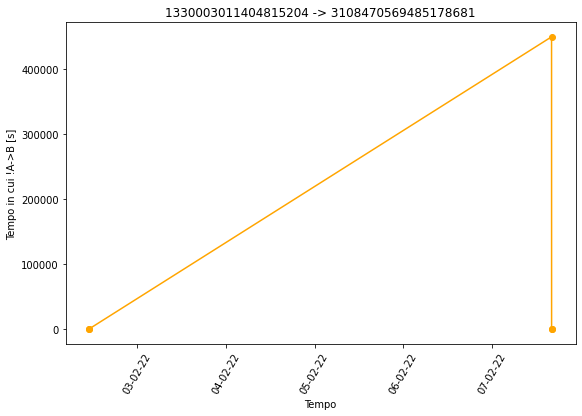

-------------------------


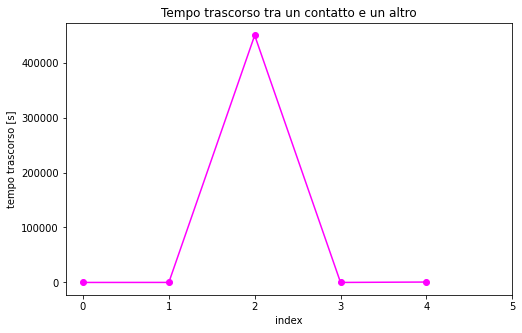

durata media contatti:8.8
quanto passa tra un contatto e un altro
--------------------
id: 1330003011404815204 -> 7496792002317501170
id: 1330003011404815204 -> 8255693867610784721
id: 8998985862534856713 -> 3656149444778942083
id: 8998985862534856713 -> 3108470569485178681
tempo medio di contatto in cui 8998985862534856713 -> 3108470569485178681
1.1666666666666667


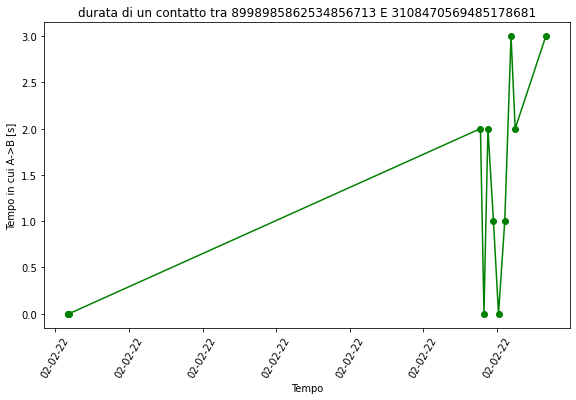

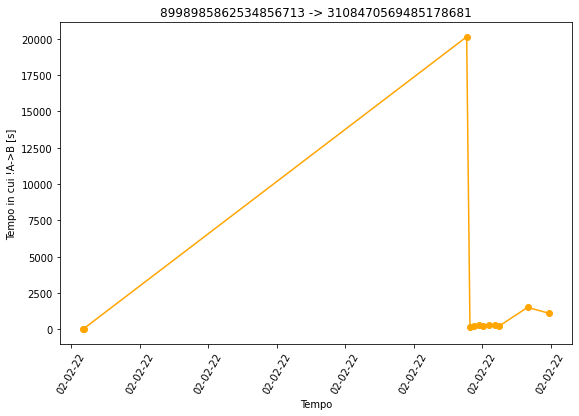

-------------------------


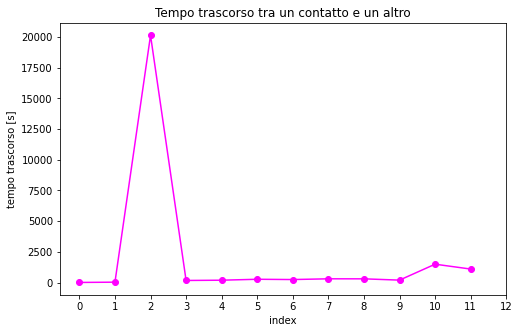

durata media contatti:1.1666666666666667
quanto passa tra un contatto e un altro
--------------------
id: 8998985862534856713 -> 7496792002317501170
tempo medio di contatto in cui 8998985862534856713 -> 7496792002317501170
0.7142857142857143


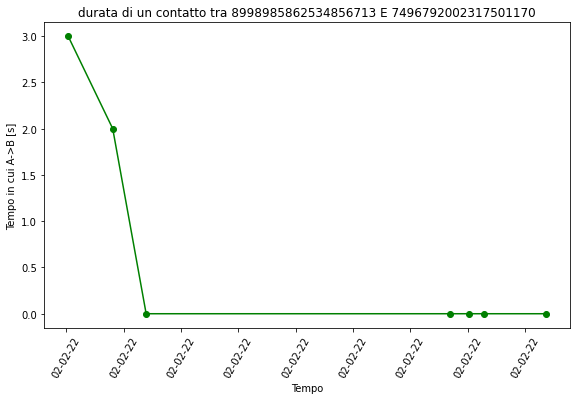

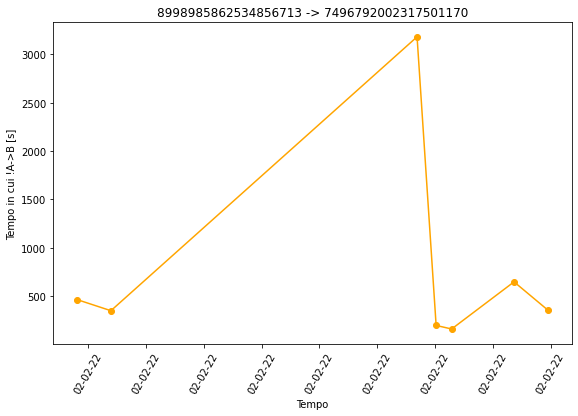

-------------------------


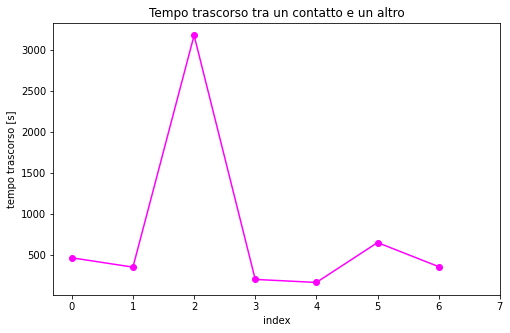

durata media contatti:0.7142857142857143
quanto passa tra un contatto e un altro
--------------------
id: 7496792002317501170 -> 3656149444778942083
tempo medio di contatto in cui 7496792002317501170 -> 3656149444778942083
26.0


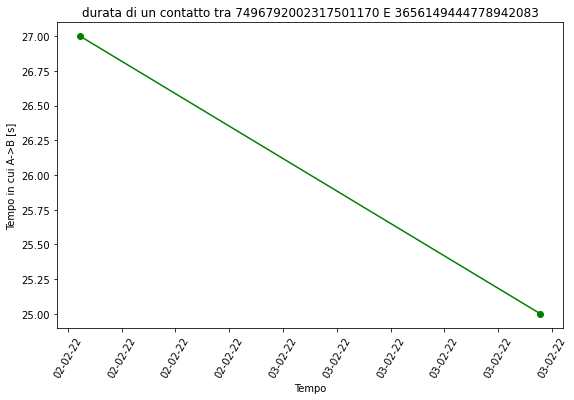

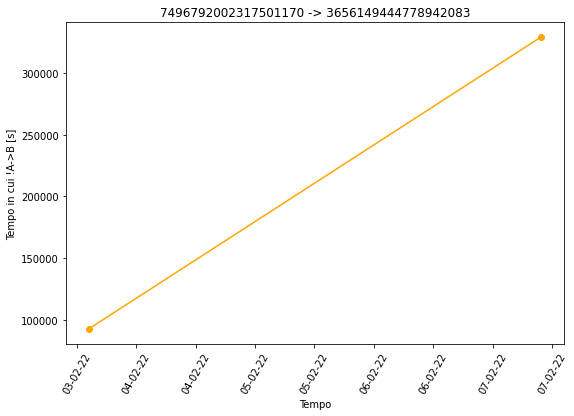

-------------------------


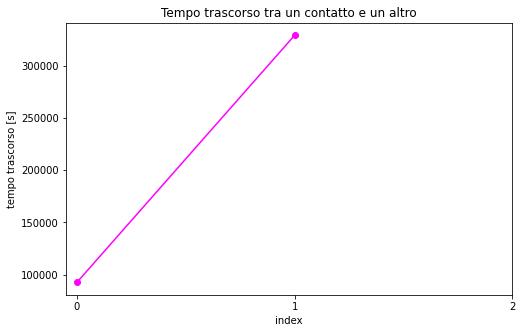

durata media contatti:26.0
quanto passa tra un contatto e un altro
--------------------
id: 7496792002317501170 -> 8998985862534856713
tempo medio di contatto in cui 7496792002317501170 -> 8998985862534856713
17.5


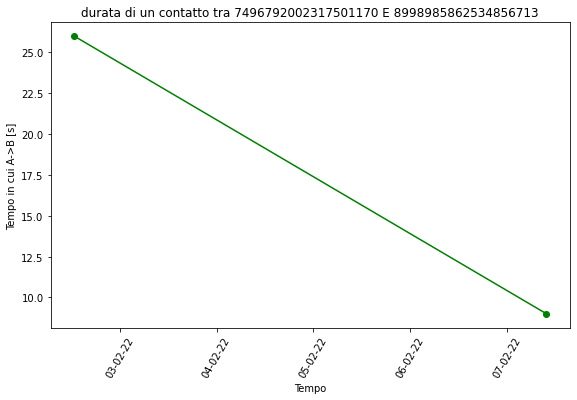

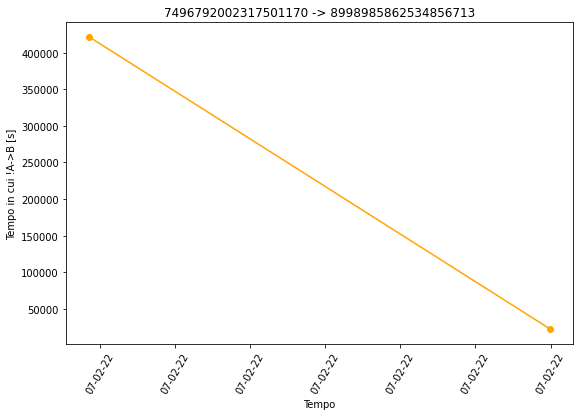

-------------------------


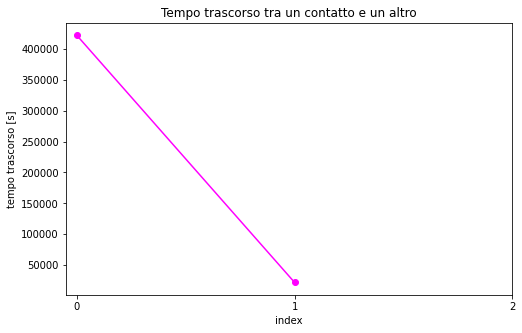

durata media contatti:17.5
quanto passa tra un contatto e un altro
--------------------
id: 7496792002317501170 -> 3108470569485178681
tempo medio di contatto in cui 7496792002317501170 -> 3108470569485178681
4.5


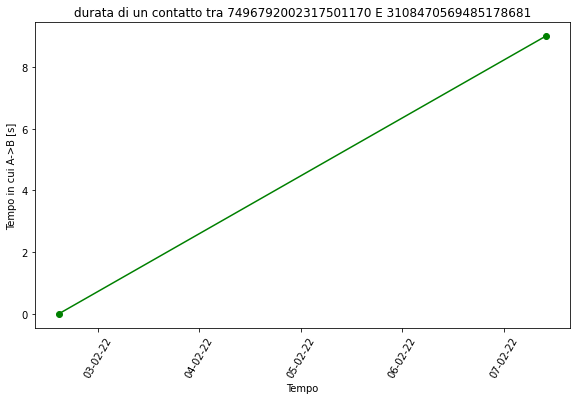

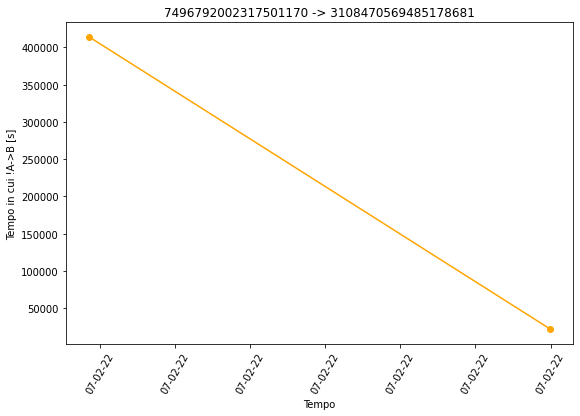

-------------------------


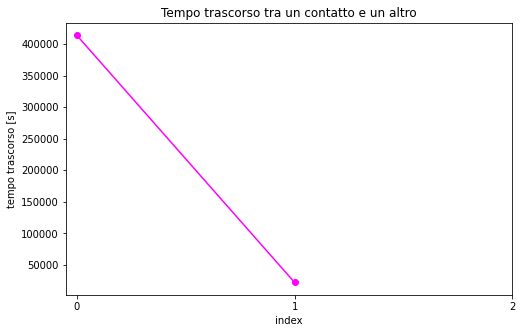

durata media contatti:4.5
quanto passa tra un contatto e un altro
--------------------
id: 7496792002317501170 -> 8255693867610784721


In [ ]:
#id = scan[0]
from matplotlib.dates import DateFormatter
formatter = DateFormatter("%d-%m-%y")
for id in scan:
  adv2 = conn.loc[conn['scanner']==id].advertiser.unique()
  for ad in adv2:
    new = list()
    lost = list()
    diffs = list()
    times_new = list()
    times_lost = list()
    print("id: " + str(id) + " -> " + str(ad))
    con3 = conn[(conn['scanner']==id) & (conn['advertiser']==ad)]#.set_index('time')
    con3 = con3.reset_index(drop=True)
    # calcolo la differenza in secondi tra due rilevazioni consecutive
    dif3 = con3.diff()
    delta_diff3 = dif3[dif3.time>'5s']

    t0 = con3.iloc[0].time

    for index, row in delta_diff3.iterrows(): 
      if index == 0:
        continue
      #print('New contact for')
      n = (con3.iloc[index-1].time-t0).total_seconds()
      
      #print(n)      
      
      #print('Lost contact for')
      l = (con3.iloc[index].time-con3.iloc[index-1].time).total_seconds()
      #print(l)
      diffs.append(abs(n-l))
      
      #devo fare una if per togliere i valori > 300
      #if n < 300:
      times_new.append(con3.iloc[index-1].time)
      new.append(n)
      #if l < 300:
      times_lost.append(con3.iloc[index].time)
      lost.append(l)
      
      
      t0=con3.iloc[index].time
      
    if len(new) < 2 or len(lost) < 2:
      continue

    m1 = statistics.mean(new)
    fig = plt.figure(figsize=(8,5))
    plt.title("durata di un contatto tra "+ str(id) + " E " + str(ad))
    print("tempo medio di contatto in cui "+ str(id) + " -> " + str(ad))
    print(statistics.mean(new))
    plt.plot_date(times_new, [int(x) for x in new],color='green', marker='o', linestyle = 'solid' )
    plt.tight_layout()
    plt.xticks(rotation=60)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Tempo in cui A->B [s]')
    
    plt.show() #display the graph
    print("")
    plt.figure(figsize=(8,5))
    plt.plot_date(times_lost, [int(x) for x in lost],color='orange', marker='o', linestyle = 'solid')
    plt.tight_layout()
    plt.xticks(rotation=60)
    ax = plt.gca()
    plt.title( str(id) + " -> " + str(ad))
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Tempo in cui !A->B [s]')
    plt.show() #display the graph
    print("-------------------------")
    fig = plt.figure(figsize=(8,5))
    data = [int(s) for s in diffs]
    plt.plot(data,color='magenta', marker='o', ) #plot the data
    plt.xticks(range(0,len(data)+1, 1)) #set the tick frequency on x-axis

    plt.ylabel('tempo trascorso [s]') #set the label for y axis
    plt.xlabel('index') #set the label for x-axis
    plt.title("Tempo trascorso tra un contatto e un altro") #set the title of the graph
    plt.show() #display the graph
    print("durata media contatti:" + str(m1))
    print("quanto passa tra un contatto e un altro")
    print("--------------------")


In [ ]:
con3['count'] = ""
con3 = con3.set_index('time').resample('1s').agg({"scanner":'mean',"advertiser":'mean',"power":'mean',"rssi":'mean',"count":'size'})
con3

,scanner,advertiser,power,rssi,count
time,,,,,
2022-02-07 15:59:51+00:00,7.496792e+18,8.255694e+18,-4.0,-73.500,2
2022-02-07 15:59:52+00:00,7.496792e+18,8.255694e+18,-4.0,-66.125,8


In [ ]:
con3 = con3.dropna().reset_index()
dif3 = con3.diff()
delta_diff3 = dif3[dif3.time>'5s']

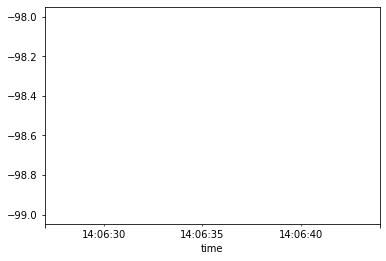

In [ ]:
res_c = con3.resample('s', on='time').rssi.mean()
res_c.plot()

In [ ]:
seen_dt = []
lost_dt = []
rssi_seen_dt=[]
hits_seen_dt = []
hits_sec = pd.DataFrame()
ths = -75
full_con = pd.DataFrame()
for id in scan:
  con2 = conn.loc[conn['scanner']==id].set_index('time')
  adv2 = con2.advertiser.unique()
  adv2 = conn.loc[conn['scanner']==id].advertiser.unique()
  print('\nScanner is: ',id)
  for ad in adv2:
    print('id ',ad,' was seen times ', len(con2.loc[con2['advertiser']==ad]))

    con3 = conn[(conn['scanner']==id) & (conn['advertiser']==ad)]#.set_index('time')
    con3['hits'] = ""
    con3 = con3.set_index('time').resample('1s').agg({"scanner":'mean',"advertiser":'mean',"power":'mean',"rssi":'mean',"hits":'size'})
    #con3 = con3.resample('s', on='time').mean().reset_index() #carefull here....
    con3 = con3.dropna().reset_index()
    full_con = full_con.append(con3)
    hits_sec = hits_sec.append(con3[['rssi','hits']])
    dif3 = con3.diff()
    delta_diff3 = dif3[dif3.time>'5s']
    t0 = con3.iloc[0]
    i0 = 0

    for index, row in delta_diff3.iterrows(): 
      seen_dt.append((con3.iloc[index-1].time-t0.time).total_seconds())
      lost_dt.append((con3.iloc[index].time-con3.iloc[index-1].time).total_seconds())
      rssi_seen_dt.append(con3.iloc[i0:index-1].rssi.mean())
      hits_seen_dt.append(con3.iloc[i0:index-1].hits.mean())
      t0=con3.iloc[index]
      i0 = index

  strong_seen = [dt for rssi, dt in zip(rssi_seen_dt,seen_dt) if rssi>ths]


Scanner is:  3656149444778942083
id  8255693867610784721  was seen times  2
id  8513144764863685509  was seen times  64
id  3108470569485178681  was seen times  1036


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


id  8998985862534856713  was seen times  26284
id  7496792002317501170  was seen times  373
id  7536319712228151608  was seen times  10
id  1765587011174908658  was seen times  1

Scanner is:  8513144764863685509
id  8255693867610784721  was seen times  81
id  3656149444778942083  was seen times  180
id  8998985862534856713  was seen times  1313
id  7536319712228151608  was seen times  33
id  3108470569485178681  was seen times  2
id  7496792002317501170  was seen times  10

Scanner is:  3108470569485178681
id  3656149444778942083  was seen times  232

Scanner is:  1330003011404815204
id  8998985862534856713  was seen times  221
id  3656149444778942083  was seen times  216
id  3108470569485178681  was seen times  161
id  7496792002317501170  was seen times  170
id  8255693867610784721  was seen times  181

Scanner is:  8998985862534856713
id  3656149444778942083  was seen times  1804
id  3108470569485178681  was seen times  56
id  7496792002317501170  was seen times  48

Scanner is:  7

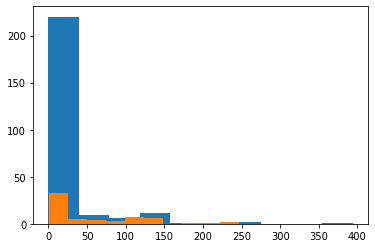

In [ ]:
plt.hist(seen_dt)
plt.hist(strong_seen)
plt.show()

(array([236.,   5.,   1.,   1.,   0.,   2.,   4.,   2.,   0.,   1.]),
 array([6.000000e+00, 6.195810e+04, 1.239102e+05, 1.858623e+05,
        2.478144e+05, 3.097665e+05, 3.717186e+05, 4.336707e+05,
        4.956228e+05, 5.575749e+05, 6.195270e+05]),
 <a list of 10 Patch objects>)

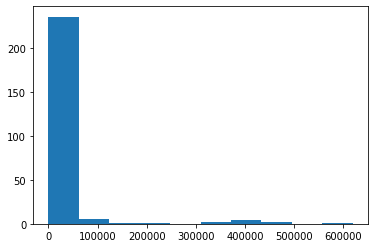

In [ ]:
plt.hist(lost_dt)

(array([36., 40., 10., 20., 24., 17., 28., 13.,  6.,  1.]),
 array([-101. ,  -95.9,  -90.8,  -85.7,  -80.6,  -75.5,  -70.4,  -65.3,
         -60.2,  -55.1,  -50. ]),
 <a list of 10 Patch objects>)

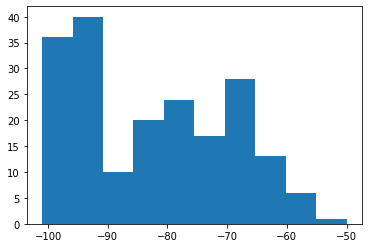

In [ ]:
plt.hist(rssi_seen_dt)

(array([157.,  33.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 1.    ,  5.4075,  9.815 , 14.2225, 18.63  , 23.0375, 27.445 ,
        31.8525, 36.26  , 40.6675, 45.075 ]),
 <a list of 10 Patch objects>)

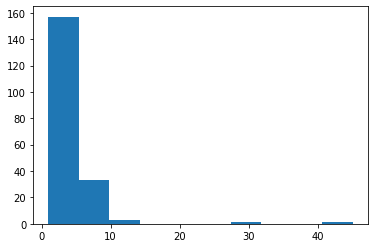

In [ ]:
plt.hist(hits_seen_dt)

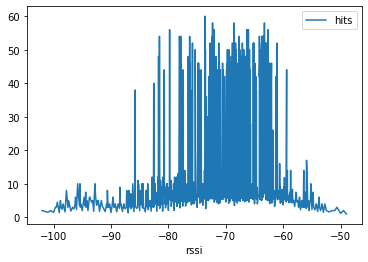

In [ ]:
hits_sec.groupby('rssi').mean().plot()

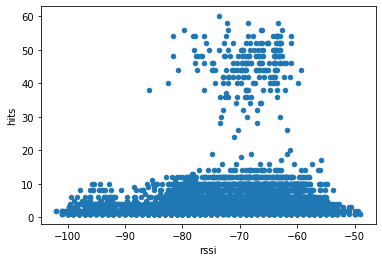

In [ ]:
hits_sec.plot.scatter(x='rssi',y='hits')

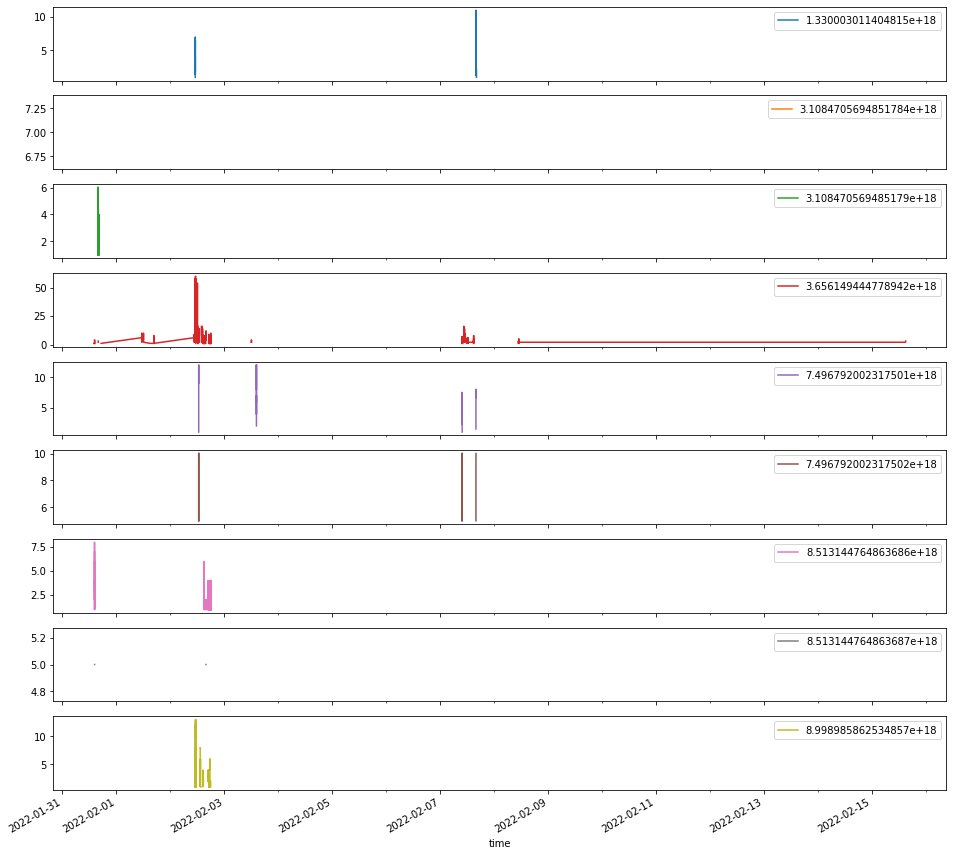

In [ ]:
plt.rcParams["figure.figsize"] = (16,16)

pd.pivot_table(full_con,
               index='time', columns='scanner', values='hits'
              ).plot(subplots=True)
plt.show()

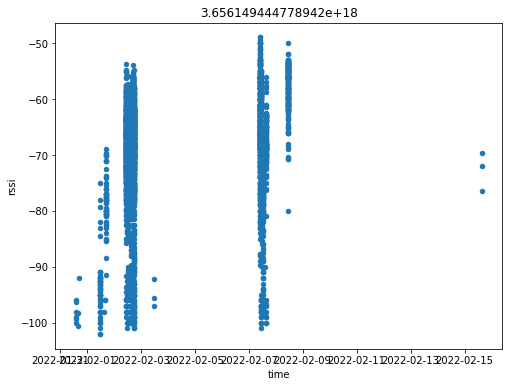

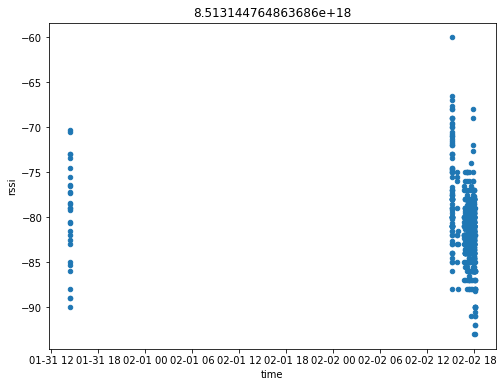

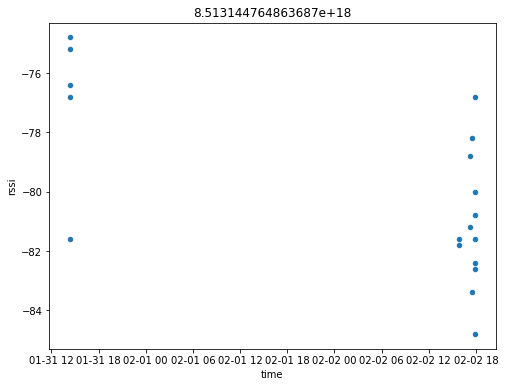

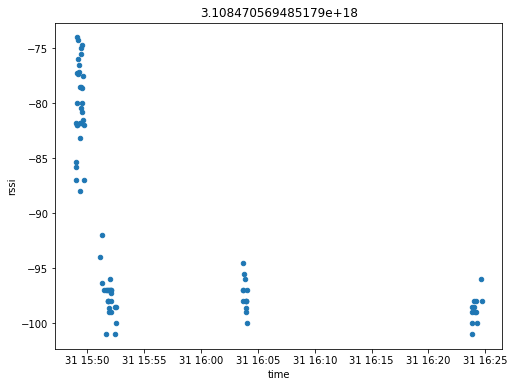

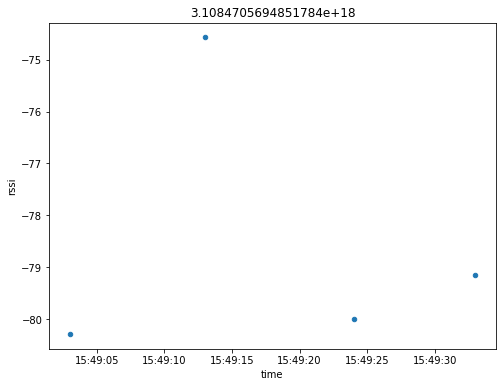

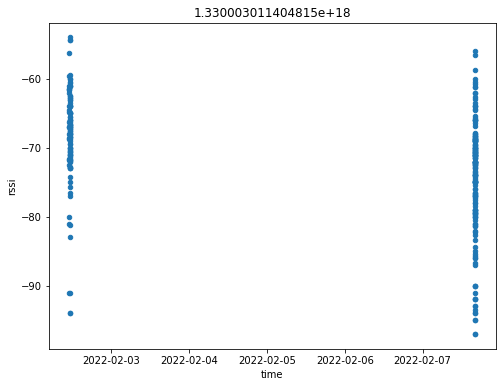

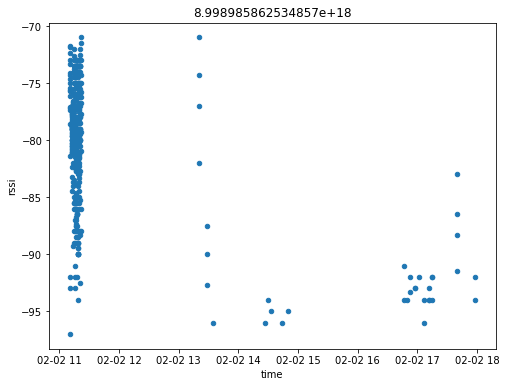

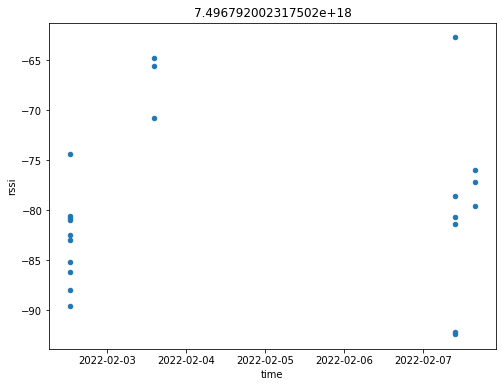

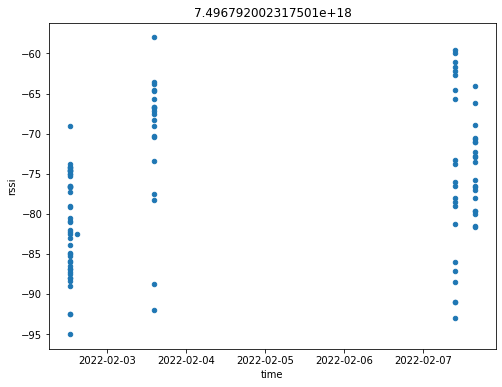

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)

for id in full_con.scanner.unique():
  full_con[full_con['scanner']==id].plot.scatter(x='time',y='rssi')
  plt.title(id)
  plt.show()

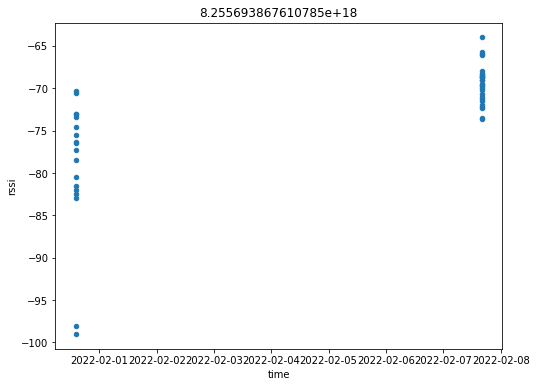

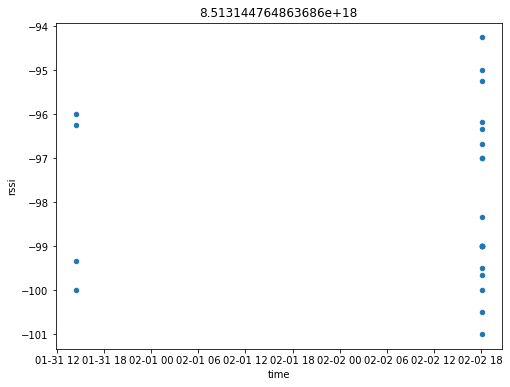

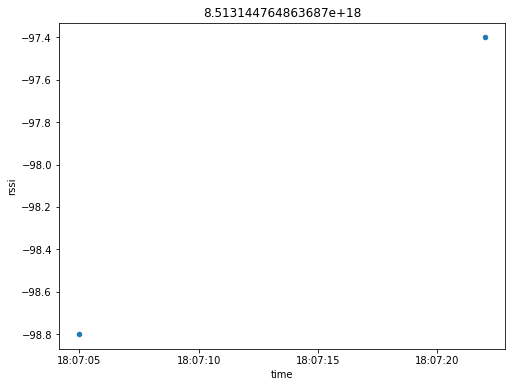

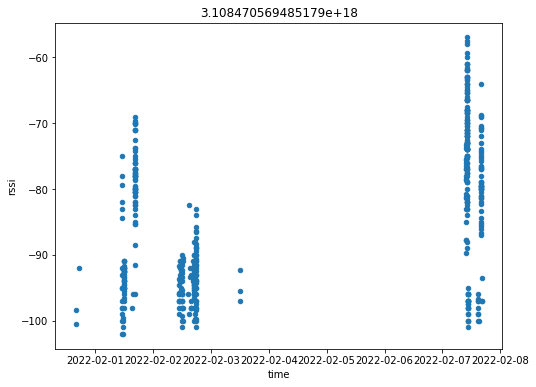

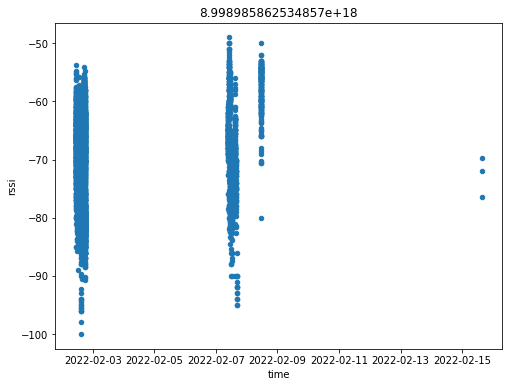

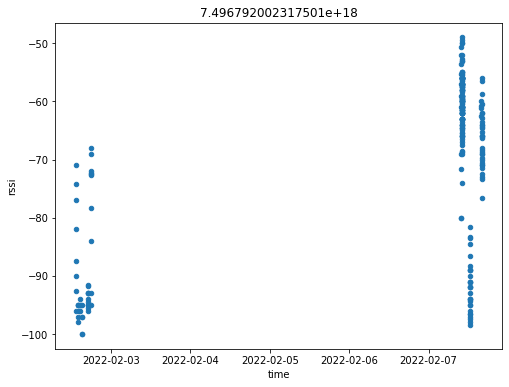

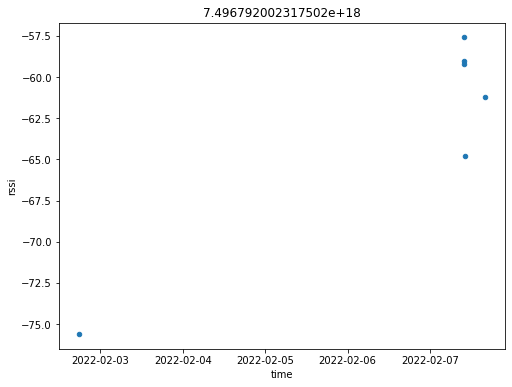

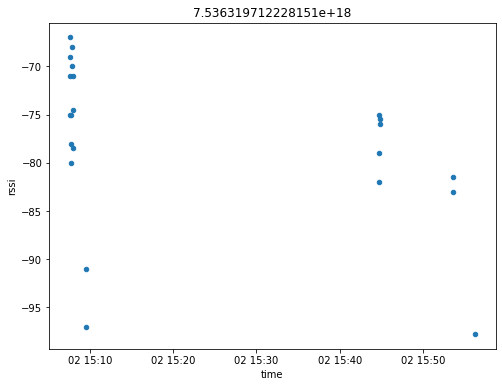

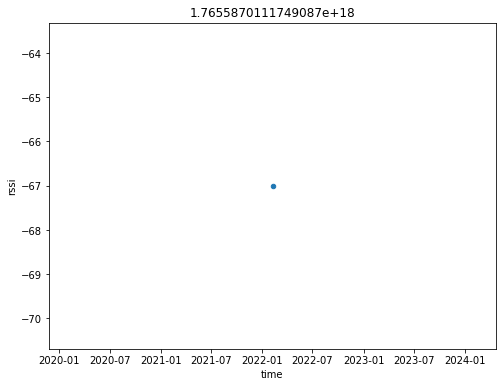

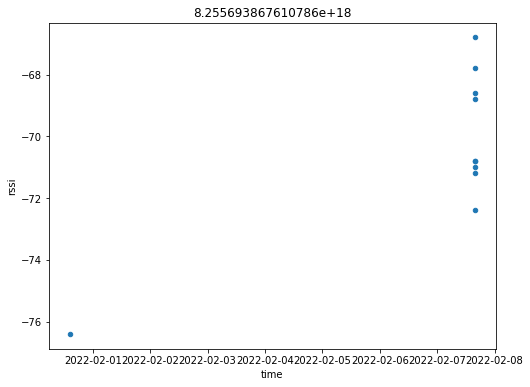

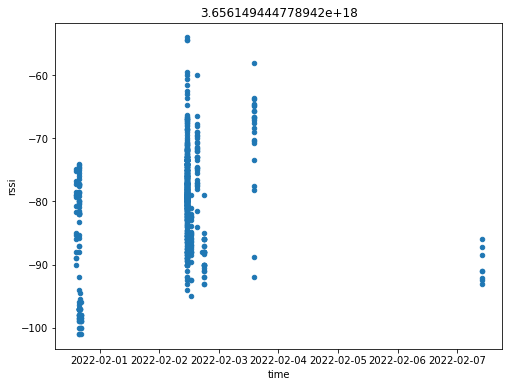

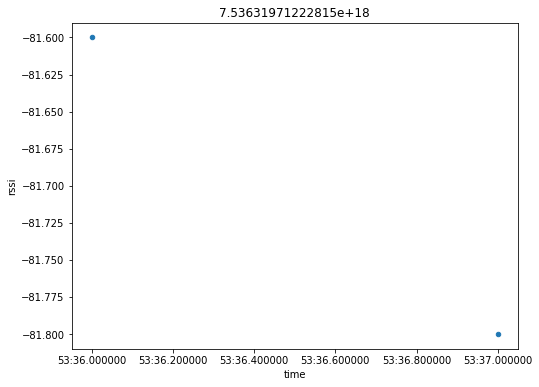

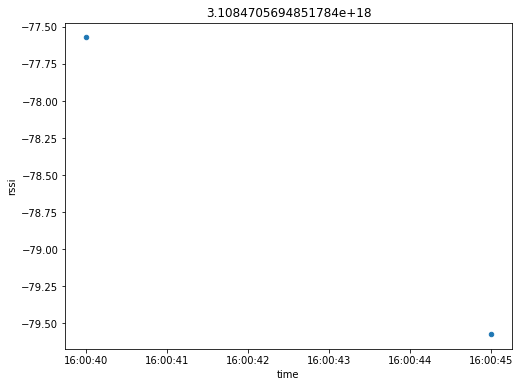

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)

for id in full_con.advertiser.unique():
  full_con[full_con['advertiser']==id].plot.scatter(x='time',y='rssi')
  plt.title(id)
  plt.show()

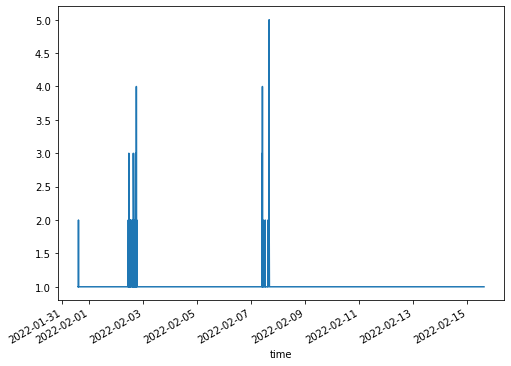

In [ ]:
full_con.groupby('time').rssi.count().plot()

In [ ]:
#$%&


ths = -90
for id in scan:
  adv2 = conn.loc[conn['scanner']==id].advertiser.unique()
  print('\nScanner is: ',id)
  for ad in adv2:
    con3 = conn[(conn['scanner']==id) & (conn['advertiser']==ad)]#.set_index('time')
    con3.resample('s', on='time').mean()
    con3 = con3.reset_index(drop=True)
    dif3 = con3.diff()
    delta_diff3 = dif3[dif3.time>'5s']
    t0 = con3.iloc[0]
    i0 = 0

    for index, row in delta_diff3.iterrows(): 
      seen_dt.append((con3.iloc[index-1].time-t0.time).total_seconds())
      lost_dt.append((con3.iloc[index].time-con3.iloc[index-1].time).total_seconds())
      rssi_seen_dt.append(con3.iloc[i0:index-1].rssi.mean())
      t0=con3.iloc[index]
      i0 = index

  strong_seen = [dt for rssi, dt in zip(rssi_seen_dt,seen_dt) if rssi>ths]


Scanner is:  3656149444778942083

Scanner is:  8513144764863685509

Scanner is:  3108470569485178681

Scanner is:  1330003011404815204

Scanner is:  8998985862534856713

Scanner is:  7496792002317501170


In [ ]:
con3

,time,scanner,advertiser,power,rssi
0,2022-02-07 15:59:51+00:00,7496792002317501170,8255693867610784721,-4,-73
1,2022-02-07 15:59:51+00:00,7496792002317501170,8255693867610784721,-4,-74
2,2022-02-07 15:59:52+00:00,7496792002317501170,8255693867610784721,-4,-63
3,2022-02-07 15:59:52+00:00,7496792002317501170,8255693867610784721,-4,-66
4,2022-02-07 15:59:52+00:00,7496792002317501170,8255693867610784721,-4,-66
5,2022-02-07 15:59:52+00:00,7496792002317501170,8255693867610784721,-4,-63
6,2022-02-07 15:59:52+00:00,7496792002317501170,8255693867610784721,-4,-64
7,2022-02-07 15:59:52+00:00,7496792002317501170,8255693867610784721,-4,-63
8,2022-02-07 15:59:52+00:00,7496792002317501170,8255693867610784721,-4,-72
9,2022-02-07 15:59:52+00:00,7496792002317501170,8255693867610784721,-4,-72
